## Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
def get_zeros_outcome_count(df,column_name):
    count = df[df[column_name] == 0].shape[0]
    print("Total No of zeros found in " + column_name + " : " + str(count))
    print(df[df[column_name] == 0].groupby('Outcome')['Age'].count())

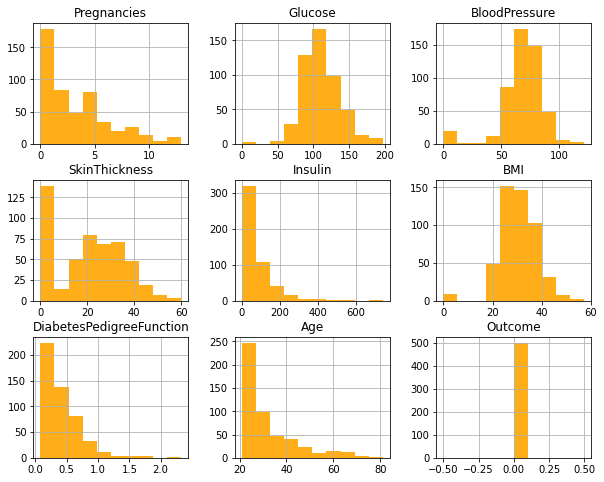

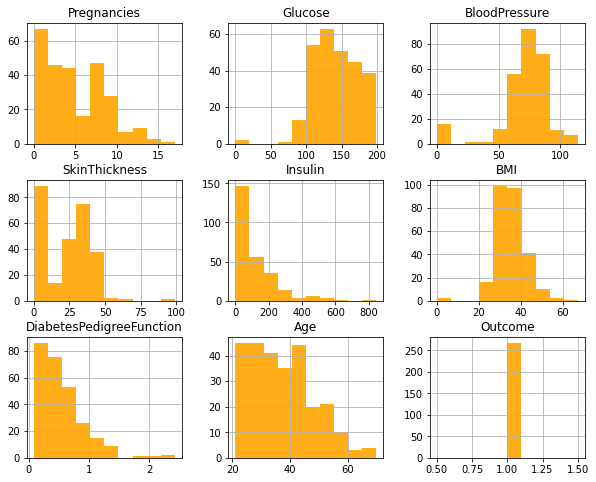

In [10]:
df.groupby('Outcome').hist(figsize = (10, 8), color = 'Orange', alpha = 0.9)
plt.show()

# Observations:
From above histograms we can clearly analyze that Glucose, BloodPressure, SkinThickness,  Insulin & BMI are having '0' which is not true for a alive person, so we will consider this values as missing values

In [11]:
get_zeros_outcome_count(df, 'Glucose')

Total No of zeros found in Glucose : 5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [12]:
get_zeros_outcome_count(df, 'BloodPressure')

Total No of zeros found in BloodPressure : 35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [13]:
get_zeros_outcome_count(df, 'SkinThickness')

Total No of zeros found in SkinThickness : 227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [14]:
get_zeros_outcome_count(df, 'Insulin')

Total No of zeros found in Insulin : 374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [15]:
get_zeros_outcome_count(df, 'BMI')

Total No of zeros found in BMI : 11
Outcome
0    9
1    2
Name: Age, dtype: int64


# Observations:
After analyzing the above data so many 0s in Insulin & SkinThickness are found and removing the 0s or putting the mean values will not be a great idea.
However we can remove the 0s from 'BMI', 'BloodPressure' & 'Glucose' as such values will not be present in alive person.

In [16]:
new_df = df[(df.BMI != 0) & (df.BloodPressure != 0) & (df.Glucose != 0)]
new_df.shape

(724, 9)

In [17]:
positive = new_df[new_df['Outcome'] == 1]
positive.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


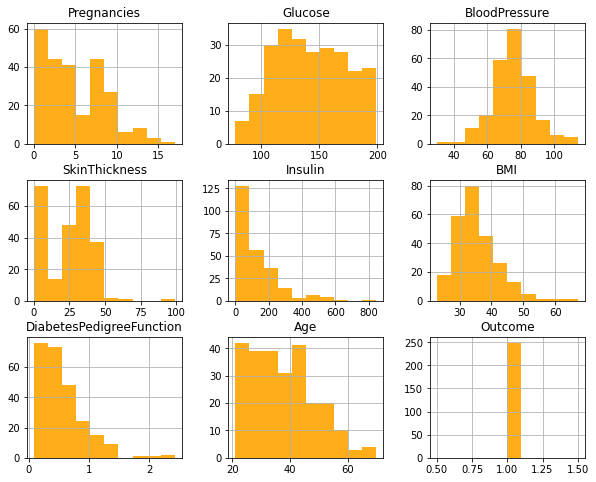

In [18]:
positive.groupby('Outcome').hist(figsize = (10,8), color = 'Orange', alpha = 0.9)
plt.show()

## Scatter plot

In [19]:
BloddPressure = positive["BloodPressure"]
BMI = positive["BMI"]
Glucose = positive["Glucose"]
Insulin = positive["Insulin"]
SkinThickness = positive["SkinThickness"]

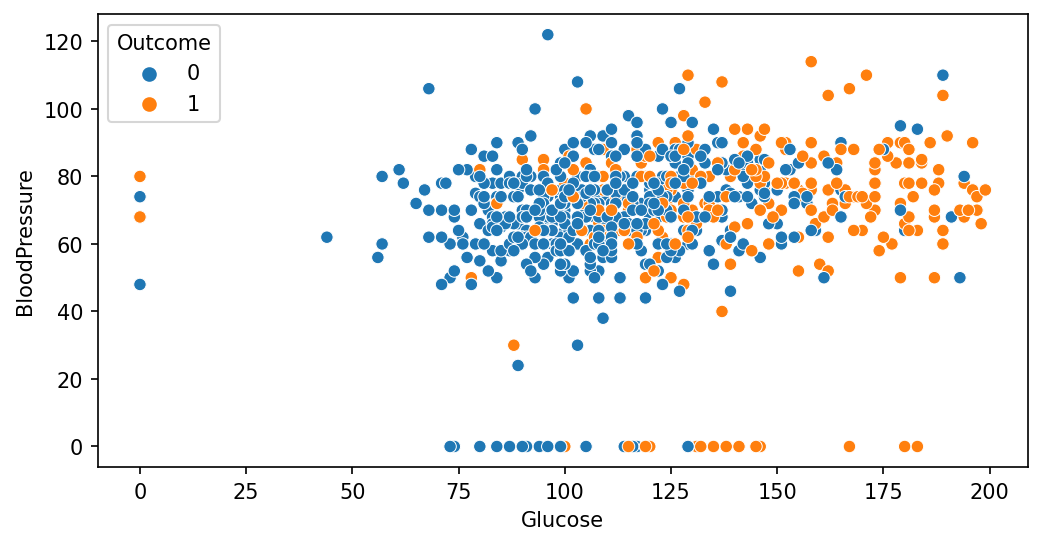

In [20]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.scatterplot(x = "Glucose", y = "BloodPressure", hue = "Outcome", data = df)
plt.show()

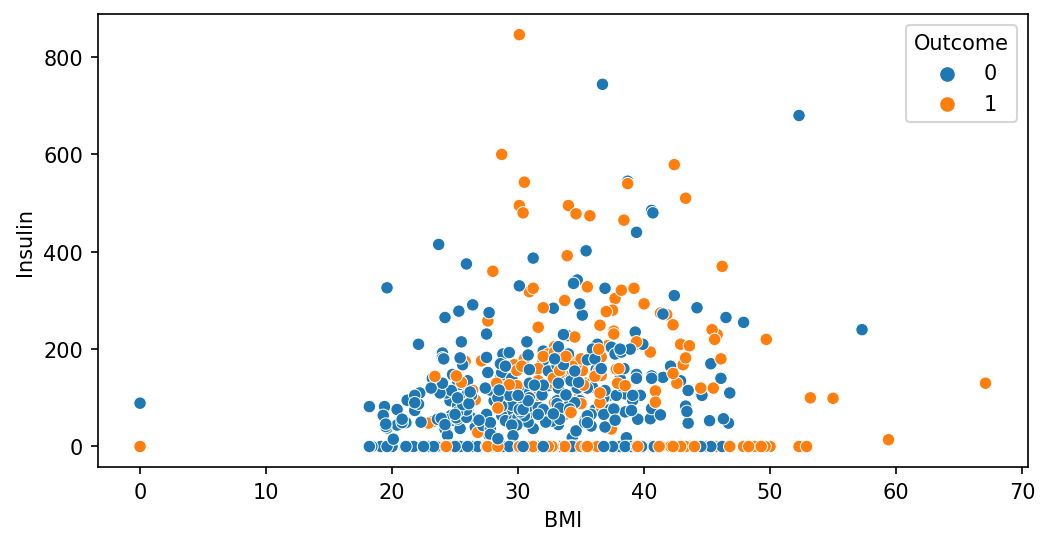

In [21]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.scatterplot(x = "BMI", y = "Insulin", hue = "Outcome", data = df)
plt.show()

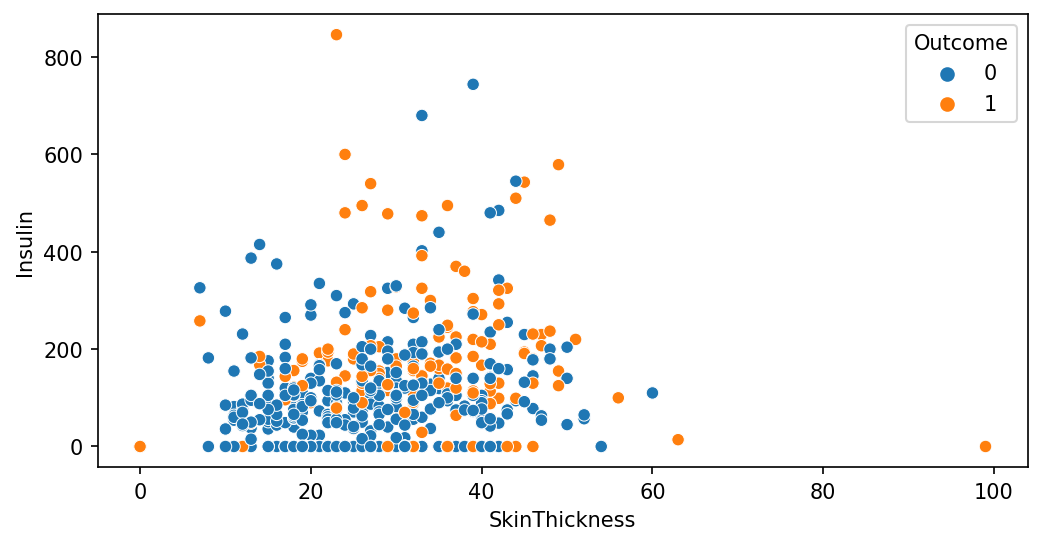

In [22]:
plt.figure(figsize = (8, 4), dpi = 150)
sns.scatterplot(x = "SkinThickness", y = "Insulin", hue = "Outcome", data = df)
plt.show()

## Correlation Matrix

In [23]:
new_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


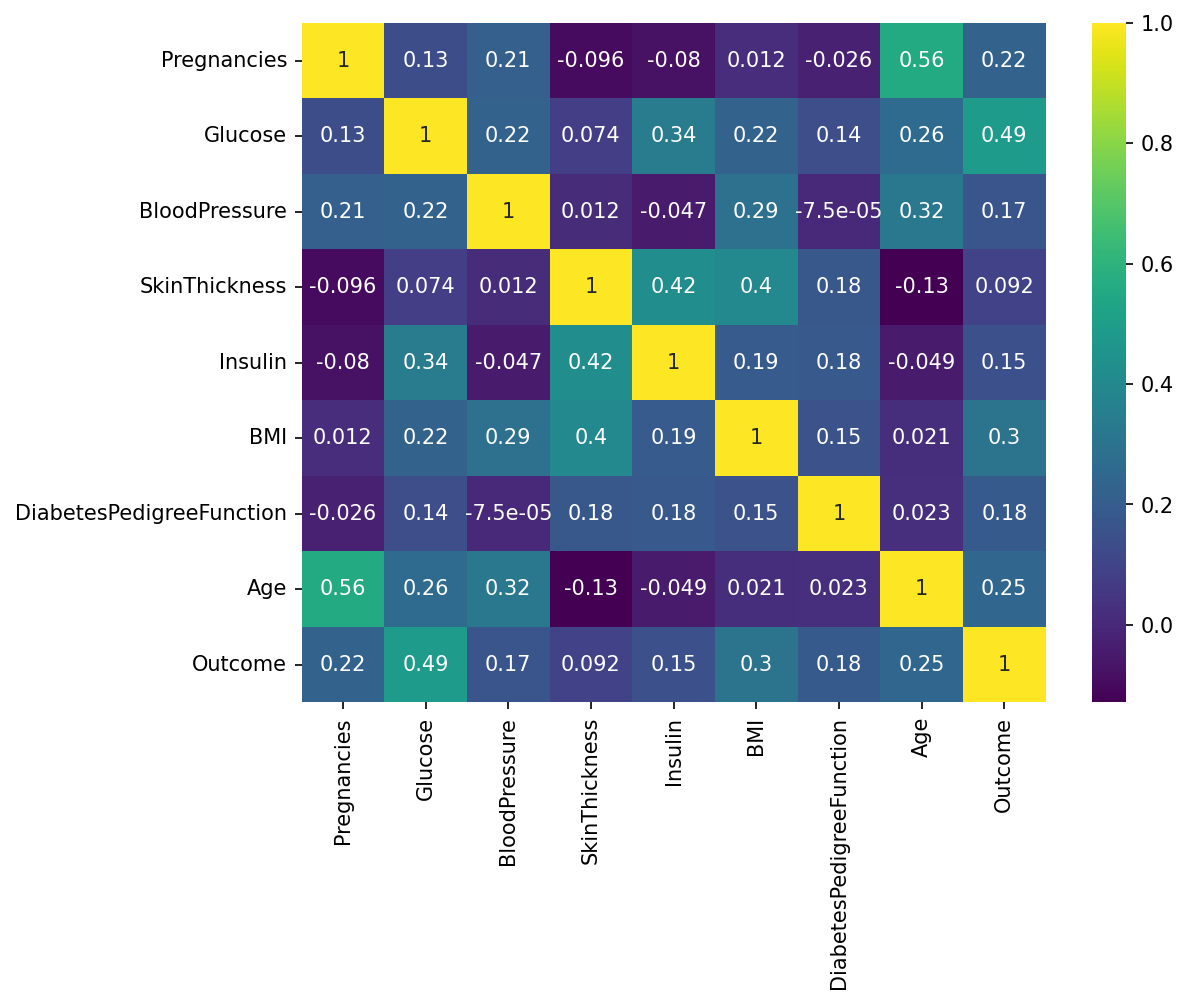

In [24]:
plt.figure(figsize = (8, 6), dpi = 150)
sns.heatmap(new_df.corr(), annot = True, cmap = 'viridis')
plt.show()

## Build Model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = new_df.drop('Outcome', axis = 1)
y = new_df['Outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score

In [29]:
LR_model = LogisticRegression(solver = 'liblinear')
LR_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
print("LogisticRegression Score :{}".format(LR_model.score(X_train,y_train)))   

y_pred = LR_model.predict(X_test)
scores = (accuracy_score(y_test, y_pred))

print("\nLogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.7651122625215889

LogisticRegression Accuracy Score :0.7862068965517242


In [31]:
accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [32]:
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    accuracyScores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(tr_split_data)

C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

  Name     Score  Accuracy Score
0   LR  0.765112        0.786207
1  SVC  0.749568        0.820690
2  KNN  0.784111        0.751724
3   DT  1.000000        0.758621
4  GNB  0.744387        0.793103
5   RF  1.000000        0.772414
6   GB  0.937824        0.793103


<Figure size 432x216 with 0 Axes>

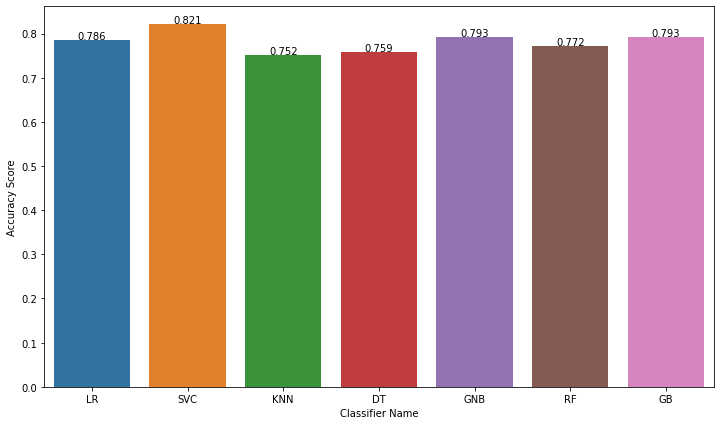

In [33]:
plt.figure(figsize = (6,3))
plt.subplots(figsize=(12,7))


axis = sns.barplot(x = 'Name', y = 'Accuracy Score', data = tr_split_data)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.002, '{:1.3f}'.format(height), ha="center")
    
plt.show()

In [34]:
cm = confusion_matrix(y,LR_model.predict(X))
cm

array([[422,  53],
       [114, 135]], dtype=int64)

In [35]:
print(classification_report(y,LR_model.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       475
           1       0.72      0.54      0.62       249

    accuracy                           0.77       724
   macro avg       0.75      0.72      0.73       724
weighted avg       0.76      0.77      0.76       724



In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

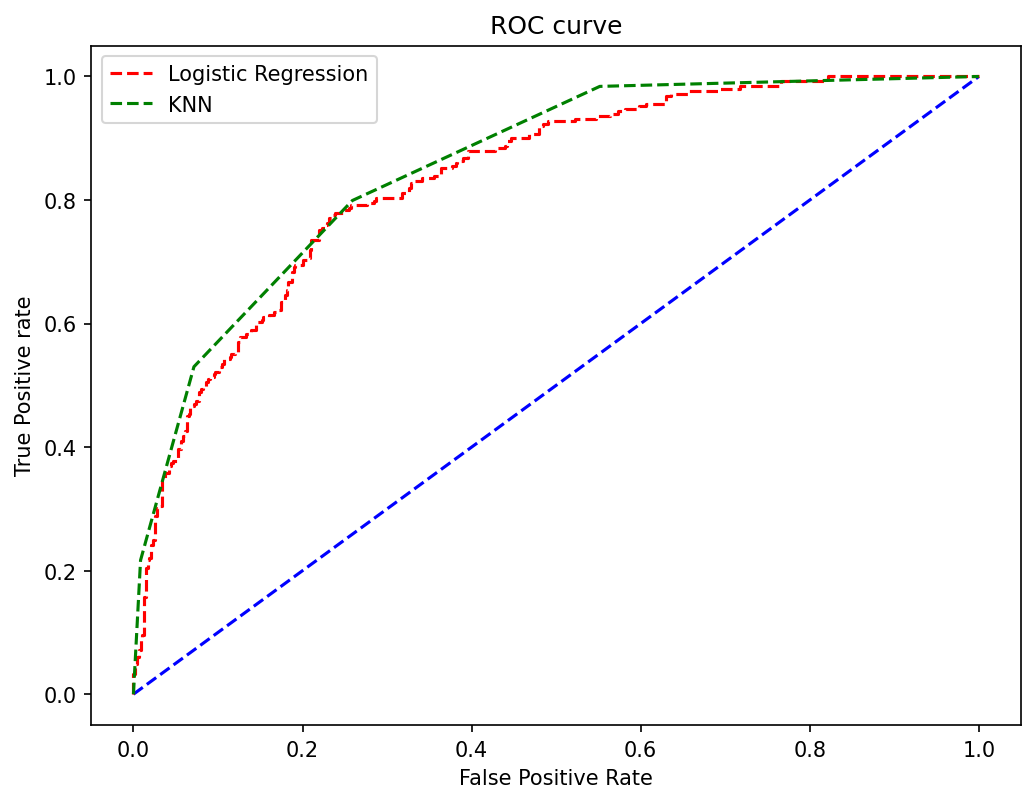

AUC LR: 0.83528 AUC KNN: 0.85476


In [37]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve) - LR, KNN
# predict probabilities for LR
plt.figure(figsize = (8, 6), dpi = 150)
probs_LR = LR_model.predict_proba(X)

# predict probabilities for KNN - where models[2] is KNN 
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
probs_KNN = model_KNN.predict_proba(X)

# Sklearn has a very potent method roc_curve() which computes the ROC for your classifier in a matter of seconds!
# It returns the FPR, TPR, and threshold values: calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs_LR[:, 1],pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y, probs_KNN[:, 1],pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

# plot no skill
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='KNN')

# plot the roc curve for the model
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
#plt.plot(fpr, tpr, marker='.')
plt.legend(loc='best')
plt.show();

# keep probabilities for the positive outcome only
#The AUC score can be computed using the roc_auc_score() method of sklearn: calculate AUC

auc_LR = roc_auc_score(y, probs_LR[:, 1])
auc_KNN = roc_auc_score(y, probs_KNN[:, 1])
print('AUC LR: %.5f' % auc_LR, 'AUC KNN: %.5f' % auc_KNN)

In [38]:
def generate_graph(recall, precision,name):    
    # plot no skill
    # plot the precision-recall curve for the model
    plt.figure()
    plt.subplots(figsize=(10,4))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label='No Skill')
    plt.plot(recall, precision, marker='.',label=name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()


===================------- Precision Recall Curve for LR ---------===================



<Figure size 432x288 with 0 Axes>

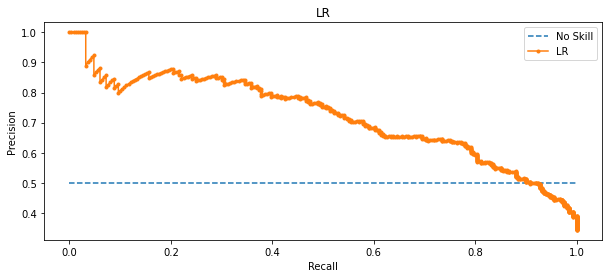

LR calculated value : F1 Score =0.618, Area Under the Curve=0.721, Average Precision=0.722

The above precision-recall curve plot is showing the precision/recall for each threshold for a LR model (orange) compared to a no skill model (blue).

===================------- Precision Recall Curve for KNN ---------===================



C:\Users\prabh\anaconda3\envs\Simplilearn\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<Figure size 432x288 with 0 Axes>

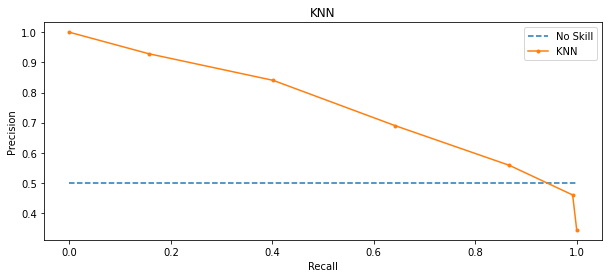

KNN calculated value : F1 Score =0.665, Area Under the Curve=0.759, Average Precision=0.703

The above precision-recall curve plot is showing the precision/recall for each threshold for a KNN model (orange) compared to a no skill model (blue).

===================------- Precision Recall Curve for DT ---------===================



<Figure size 432x288 with 0 Axes>

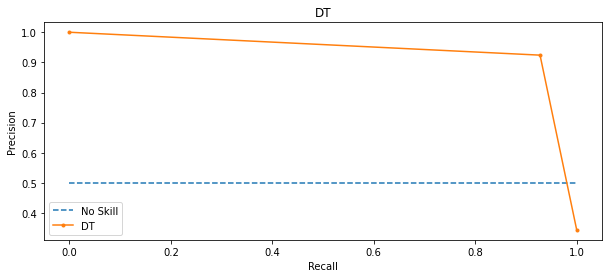

DT calculated value : F1 Score =0.926, Area Under the Curve=0.938, Average Precision=0.882

The above precision-recall curve plot is showing the precision/recall for each threshold for a DT model (orange) compared to a no skill model (blue).

===================------- Precision Recall Curve for GNB ---------===================



<Figure size 432x288 with 0 Axes>

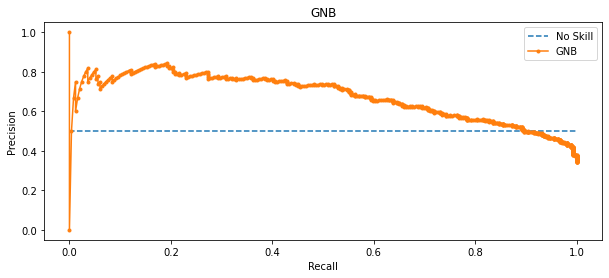

GNB calculated value : F1 Score =0.628, Area Under the Curve=0.675, Average Precision=0.678

The above precision-recall curve plot is showing the precision/recall for each threshold for a GNB model (orange) compared to a no skill model (blue).

===================------- Precision Recall Curve for RF ---------===================



<Figure size 432x288 with 0 Axes>

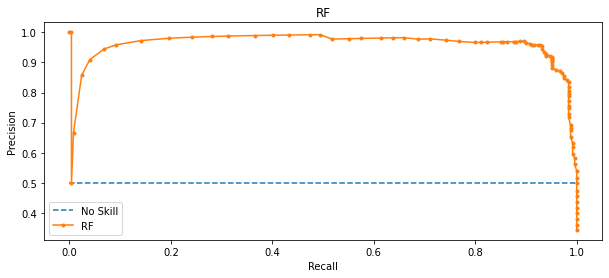

RF calculated value : F1 Score =0.934, Area Under the Curve=0.959, Average Precision=0.963

The above precision-recall curve plot is showing the precision/recall for each threshold for a RF model (orange) compared to a no skill model (blue).

===================------- Precision Recall Curve for GB ---------===================



<Figure size 432x288 with 0 Axes>

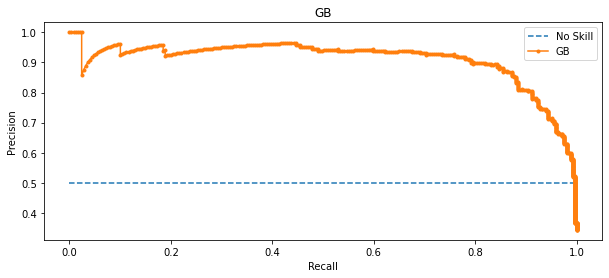

GB calculated value : F1 Score =0.862, Area Under the Curve=0.910, Average Precision=0.910

The above precision-recall curve plot is showing the precision/recall for each threshold for a GB model (orange) compared to a no skill model (blue).


In [39]:
#Store algorithm into array to get score and accuracy
p_r_Models = []
p_r_Models.append(('LR', LogisticRegression(solver='liblinear')))
p_r_Models.append(('KNN', KNeighborsClassifier()))
p_r_Models.append(('DT', DecisionTreeClassifier()))
p_r_Models.append(('GNB', GaussianNB()))
p_r_Models.append(('RF', RandomForestClassifier()))
p_r_Models.append(('GB', GradientBoostingClassifier()))


#Precision Recall Curve for All classifier
for name, model in p_r_Models:
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import f1_score
    from sklearn.metrics import auc
    from sklearn.metrics import average_precision_score
    print("\n===================------- Precision Recall Curve for {} ---------===================\n".format(name))
    
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # predict class values
    yhat = model.predict(X)
    
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y, probs)
    
    # calculate F1 score, # calculate precision-recall AUC
    f1, auc = f1_score(y, yhat), auc(recall, precision)
    
    # calculate average precision score
    ap = average_precision_score(y, probs)
    generate_graph(recall, precision,name)
    print(str(name) + " calculated value : " + 'F1 Score =%.3f, Area Under the Curve=%.3f, Average Precision=%.3f\n' % (f1, auc, ap))
    print("The above precision-recall curve plot is showing the precision/recall for each threshold for a {} model (orange) compared to a no skill model (blue).".format(name))

## Dashboard in Tableau

In [40]:
from IPython import display

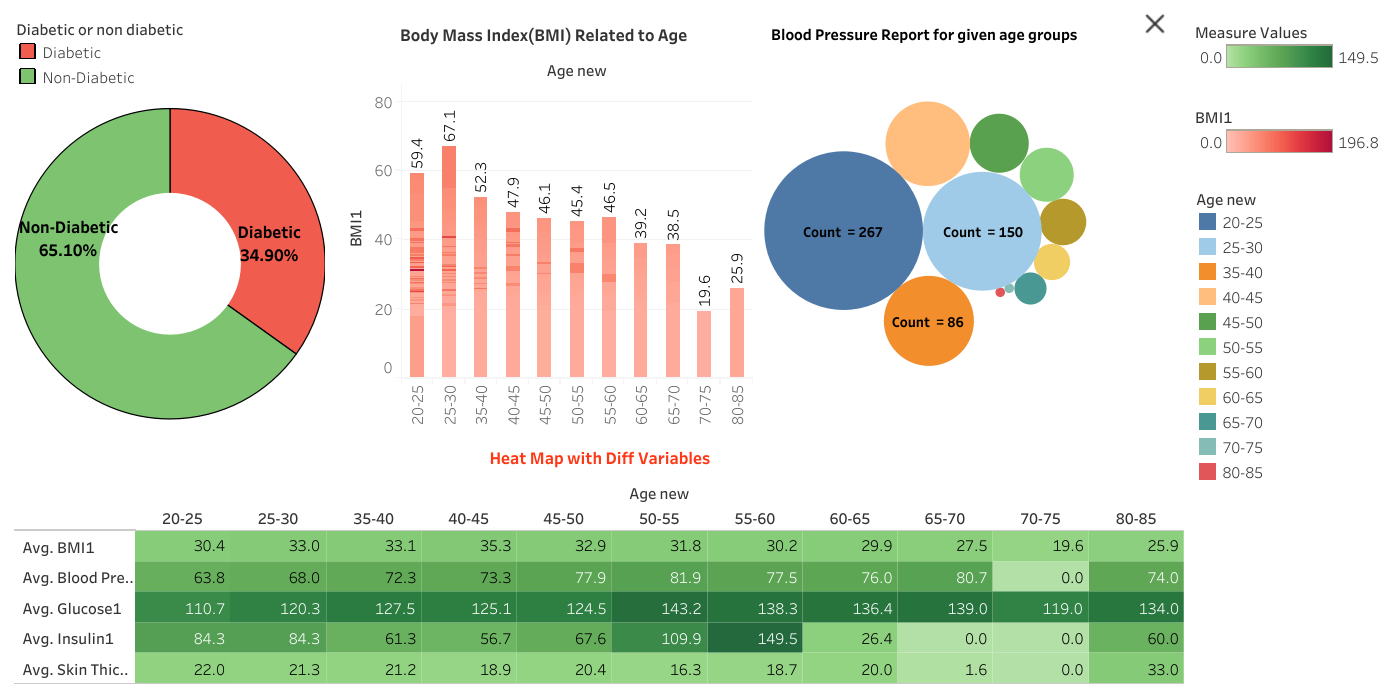

In [41]:
display.Image(r"C:\Users\prabh\Simplilearn\Data Science Capstone Project\Tableau Dashboard.png")

## Dashboard
https://public.tableau.com/authoring/Capstone_Project_Healthcare_16783653500920/Dashboard1#1